# C. Exploratory analysis of price distribution

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
to_keep = pd.read_csv('DEF_IMMO.csv', sep=',', na_values='None')

In [7]:
to_keep.columns

Index(['Unnamed: 0', 'type_of_property', 'subtype_of_property', 'locality',
       'province', 'région', 'price', 'number_of_facades', 'house_area',
       'house_area_cat', 'number_of_rooms', 'number_of_rooms_cat',
       'surface_of_the_land', 'surface_of_the_land_cat',
       'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace',
       'terrace_area', 'open_fire', 'swimming_pool', 'state_of_the_building',
       'construction_year', 'construction_year_cat'],
      dtype='object')

In [8]:
to_keep['price'].describe()

count     42352.000000
mean     313452.312287
std      169954.889760
min        2500.000000
25%      199000.000000
50%      271262.500000
75%      379000.000000
max      950000.000000
Name: price, dtype: float64

## 1. Total sample

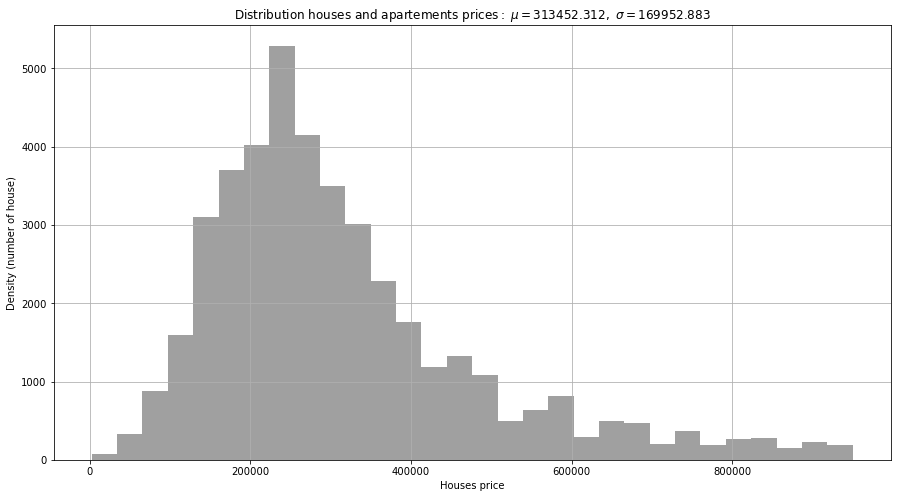

In [59]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,8)) 


# best fit of data
(mu, sigma) = norm.fit(to_keep['price'])

# the histogram of the data
n, bins, patches = plt.hist(to_keep['price'], 30, density = 0,facecolor='grey', alpha=0.75)


#plot
plt.xlabel('Houses price')
plt.ylabel('Density (number of house)')
plt.title(r'$\mathrm{Distribution\ houses\ and\ apartements\ prices:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()


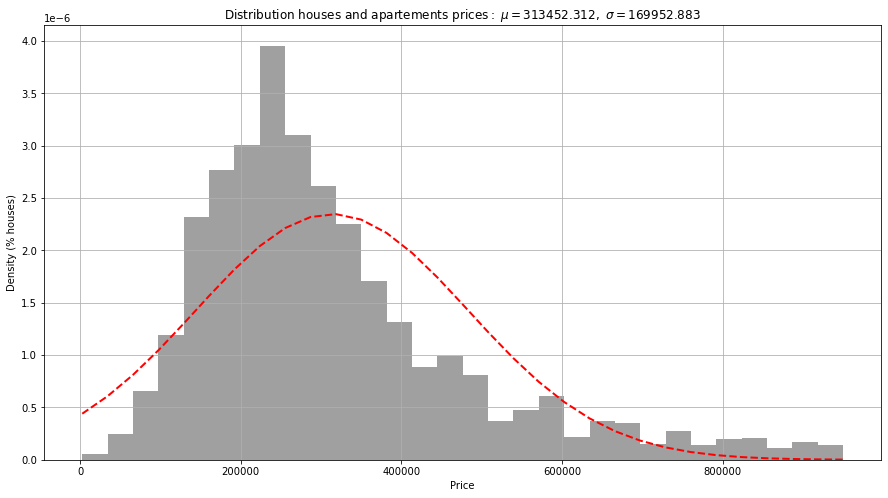

In [57]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,8)) 


# best fit of data
(mu, sigma) = norm.fit(to_keep['price'])

# the histogram of the data
n, bins, patches = plt.hist(to_keep['price'], 30
                            , density = 1,facecolor='grey', alpha=0.75)

# add a 'best fit' line
from scipy.stats import norm


y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Price')
plt.ylabel('Density (% houses)')
plt.title(r'$\mathrm{Distribution\ houses\ and\ apartements\ prices:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()


Density parameters in plt.hist
- If True , the first element of the return tuple will be the counts normalized to form a probability density, i.e., the area (or integral) under the histogram will sum to 1. This is achieved by dividing the count by the number of observations times the bin width and not dividing by the total number of observations.

The kurtosis values can be interpreted in the following manner:

- if the number is greater than +1, the distribution is too peaked
- if the number is less than –1, the distribution is too flat. 

In [47]:
pd.DataFrame(to_keep['price']).kurtosis()[0]


1.8747249507594694

The skewness values can be interpreted in the following manner:

- positive skew = left assymetry
- negative skew = right assymetry


- Highly skewed distribution: If the skewness value is less than −1 or greater than +1.
- Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.
- Approximately symmetric distribution: If the skewness value is between −½ and +½.

In [49]:
pd.DataFrame(to_keep['price']).skew()[0]


1.3586812444158802

Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered nonnormal." (Hair et al., 2017, p. 61).

## 2. Houses and appartment subsamples

In [61]:
house= to_keep[to_keep['type_of_property']=='house']
apart= to_keep[to_keep['type_of_property']=='apartment']


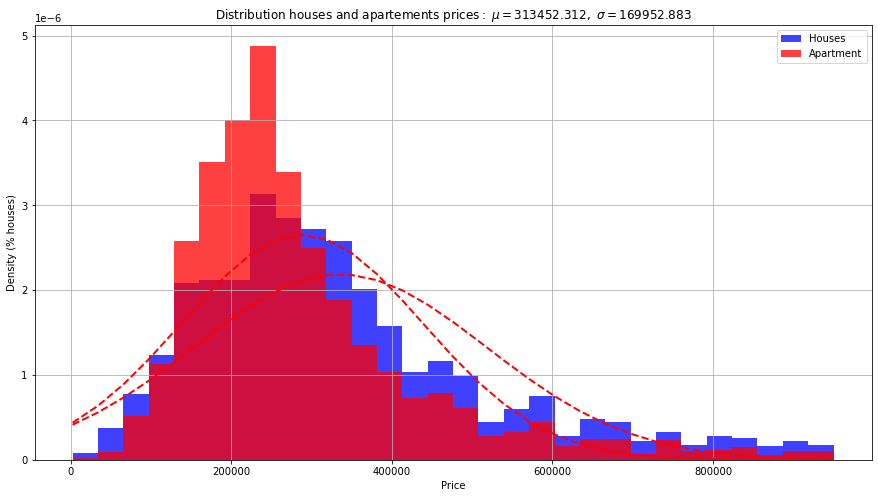

In [68]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,8)) 


# best fit of data
(muH, sigmaH) = norm.fit(house['price'])
(muA, sigmaA) = norm.fit(apart['price'])

# the histogram of the data
nH, binsH, patchesH = plt.hist(house['price'], 30 , density = 1,facecolor='blue', alpha=0.75, label="Houses")
nA, binsA, patchesA = plt.hist(apart['price'], 30 , density = 1,facecolor='red', alpha=0.75, label="Apartment")

# add a 'best fit' line
from scipy.stats import norm


yH = norm.pdf(binsH, muH, sigmaH)
l = plt.plot(binsH, yH, 'r--', linewidth=2)
yA = norm.pdf(binsA, muA, sigmaA)
l = plt.plot(binsA, yA, 'r--', linewidth=2)

#plot
plt.xlabel('Price')
plt.ylabel('Density (% houses)')
plt.title(r'$\mathrm{Distribution\ houses\ and\ apartements\ prices:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
x1 = df.loc[df.cut=='Ideal', 'depth']
x2 = df.loc[df.cut=='Fair', 'depth']
x3 = df.loc[df.cut=='Good', 'depth']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='Ideal')
plt.hist(x2, **kwargs, color='b', label='Fair')
plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.xlim(50,75)
plt.legend();


In [69]:
pd.DataFrame(house['price']).kurtosis()[0]

1.0177020769021459

In [70]:
pd.DataFrame(apart['price']).kurtosis()[0]

3.510095739423418

In [71]:
pd.DataFrame(house['price']).skew()[0]

1.0947659692945584

In [72]:
pd.DataFrame(apart['price']).skew()[0]

1.7235694050892294